In [12]:
import nsfg
import thinkplot
import thinkstats2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['legend.fontsize'] = 20

In [2]:
df = nsfg.ReadFemResp()
sorted(df.numkdhh.unique())
#this column is for kids < 18 according to code book

#0: no Children
#1: 1 Child ...and so on

[0, 1, 2, 3, 4, 5]

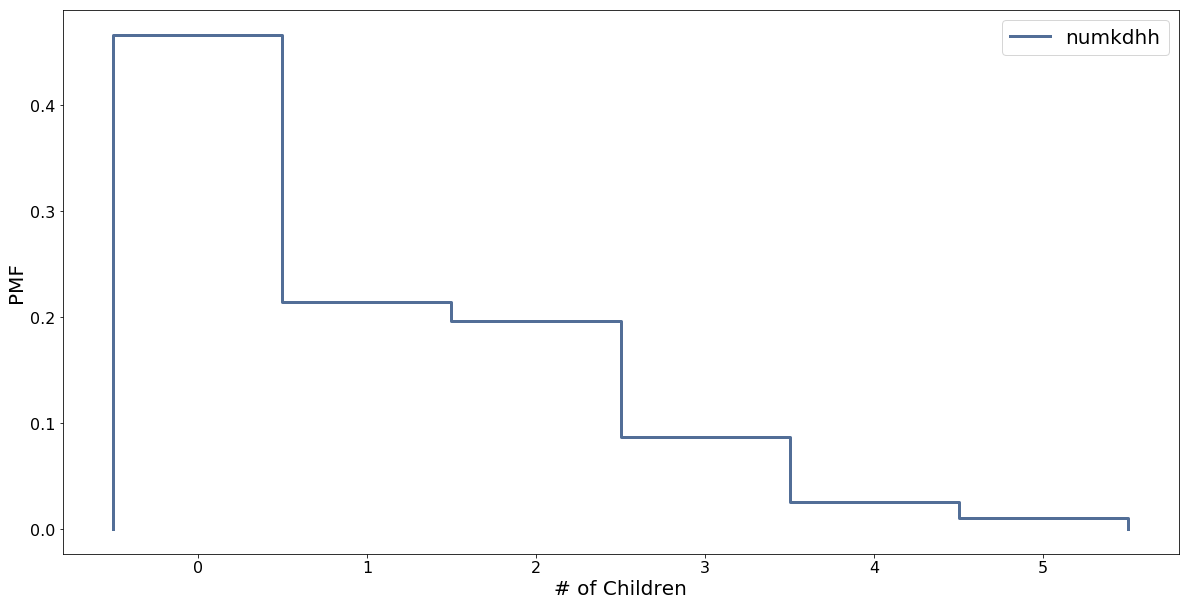

In [13]:
numkdhh_dist = thinkstats2.Pmf(df.numkdhh, label='numkdhh')
thinkplot.Pmf(numkdhh_dist)
thinkplot.Show(xlabel = "# of Children", ylabel = "PMF")

In [14]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label) #makes a copy of your authentic PMF
    
    for x, y in pmf.Items():#original pmf here
        new_pmf.Mult(x,x)
        
        #the first x gets the associted pmf for an observation
        #second x mutiplies this pmf by the observation count itself.
        #This Biases the PMF by multiplying the 
        #authentic probability for an observation, 
        #by the number of times it is observed 
        
    new_pmf.Normalize() #normalizes this new_pmf on a [0,1] scale
    
    return new_pmf

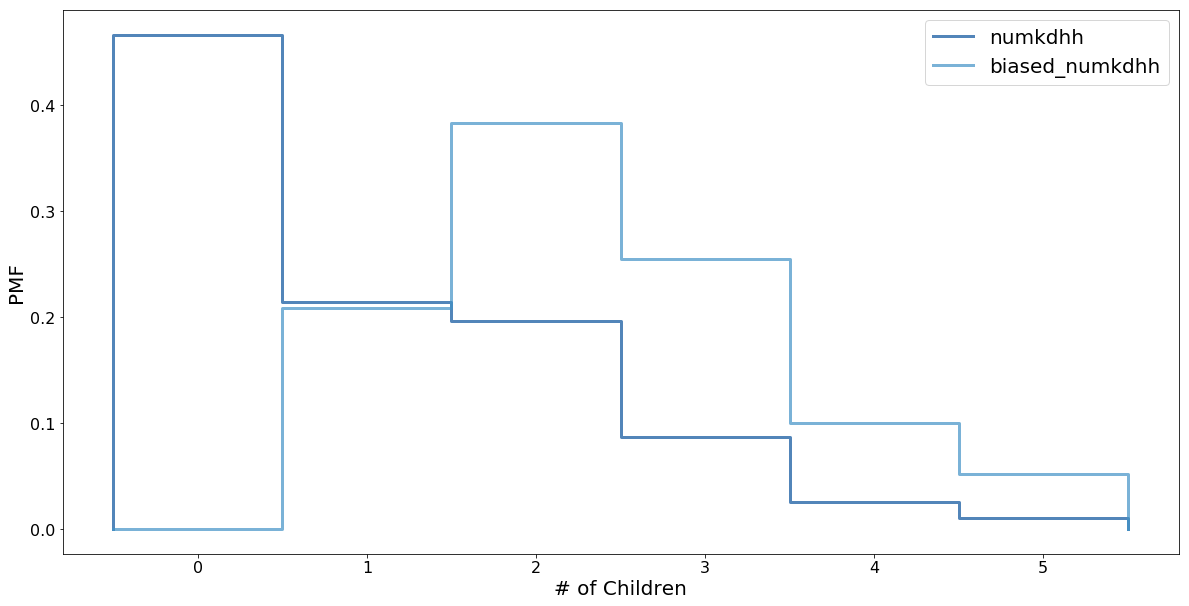

In [15]:
numkh_biased = BiasPmf(numkdhh_dist, label = 'biased_numkdhh')
thinkplot.PrePlot(2) #3 pmfs to be plotted
thinkplot.Pmfs([numkdhh_dist, numkh_biased])
thinkplot.Show(xlabel = "# of Children", ylabel="PMF")

In [16]:
numkdhh_dist.Mean()

1.0242051550438309

In [17]:
numkh_biased.Mean()

2.4036791006642821